In [334]:
import numpy as np
import random as rnd
import math

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [335]:
def generate_info(a=-10, b=10, N=2, size=1000):
    coefs = np.random.normal(0, 1, N - 1)
    
    X_1 = np.random.uniform(a, b, (size, N - 1))
    Y_1 = X_1.dot(coefs) + 4 + np.random.normal(0, 1, size)
    O_1 = np.ones(size, dtype=int)
    data_1 = np.column_stack((X_1, Y_1, O_1))
    
    X_2 = np.random.uniform(a, b, (size, N - 1))
    Y_2 = X_2.dot(coefs) - 4 + np.random.normal(0, 1, size)
    O_2 = (-1) * np.ones(size, dtype=int)
    data_2 = np.column_stack((X_2, Y_2, O_2))
    
    data = np.row_stack((data_1, data_2))
    np.random.shuffle(data)
    
    labels = data[:, N]
    data = np.delete(data, obj=N, axis=1)
    
    return (data, labels)

In [336]:
class SVM_LinearSeparableCase:
    """ This model can be used for absolutely separable data """
    
    def __init__(self, rate, iters=None):
        self.rate = rate
        self.iters = iters
    
    def fit(self, X_train, y_train, eps=1e-10):
        """ 
            Fit the model
            It's necessary to find good RATE for convergence the function of quadric programming
        """
        self.iters = X_train.shape[0] * 1200 if self.iters is None else self.iters
        
        c_matrix = np.outer(y_train, y_train) * (0.5 * np.dot(X_train, X_train.T) + 1)
        
        lmbd = np.zeros((X_train.shape[0]))
        old_lmbd = lmbd + 1
        counter = 0
        
        while np.dot(lmbd - old_lmbd, lmbd - old_lmbd) > eps and counter <= self.iters:
            
            old_lmbd = lmbd
            counter += 1
            
            delta = 2 * np.dot(c_matrix, lmbd) - 1
            lmbd = lmbd - self.rate * delta
            lmbd = np.where(lmbd > 0, lmbd, 0)
        
        self.w = sum(np.array([lmbd[i] * y_train[i] * X_train[i] for i in range(X_train.shape[0])]))
        
        indexes = np.array([i for i in range(X_train.shape[0]) if lmbd[i] > 0])
        self.b = sum(np.array([y_train[i] - np.dot(self.w, X_train[i]) for i in indexes])) / len(indexes)
        
    def predict(self, X):
        labels = np.dot(X, self.w) + self.b
        labels = np.where(labels >= 0, 1, -1)
        
        return labels

In [337]:
size = 600
a = -10
b = 10
N = 2
data, labels = generate_info(a, b, N, size)

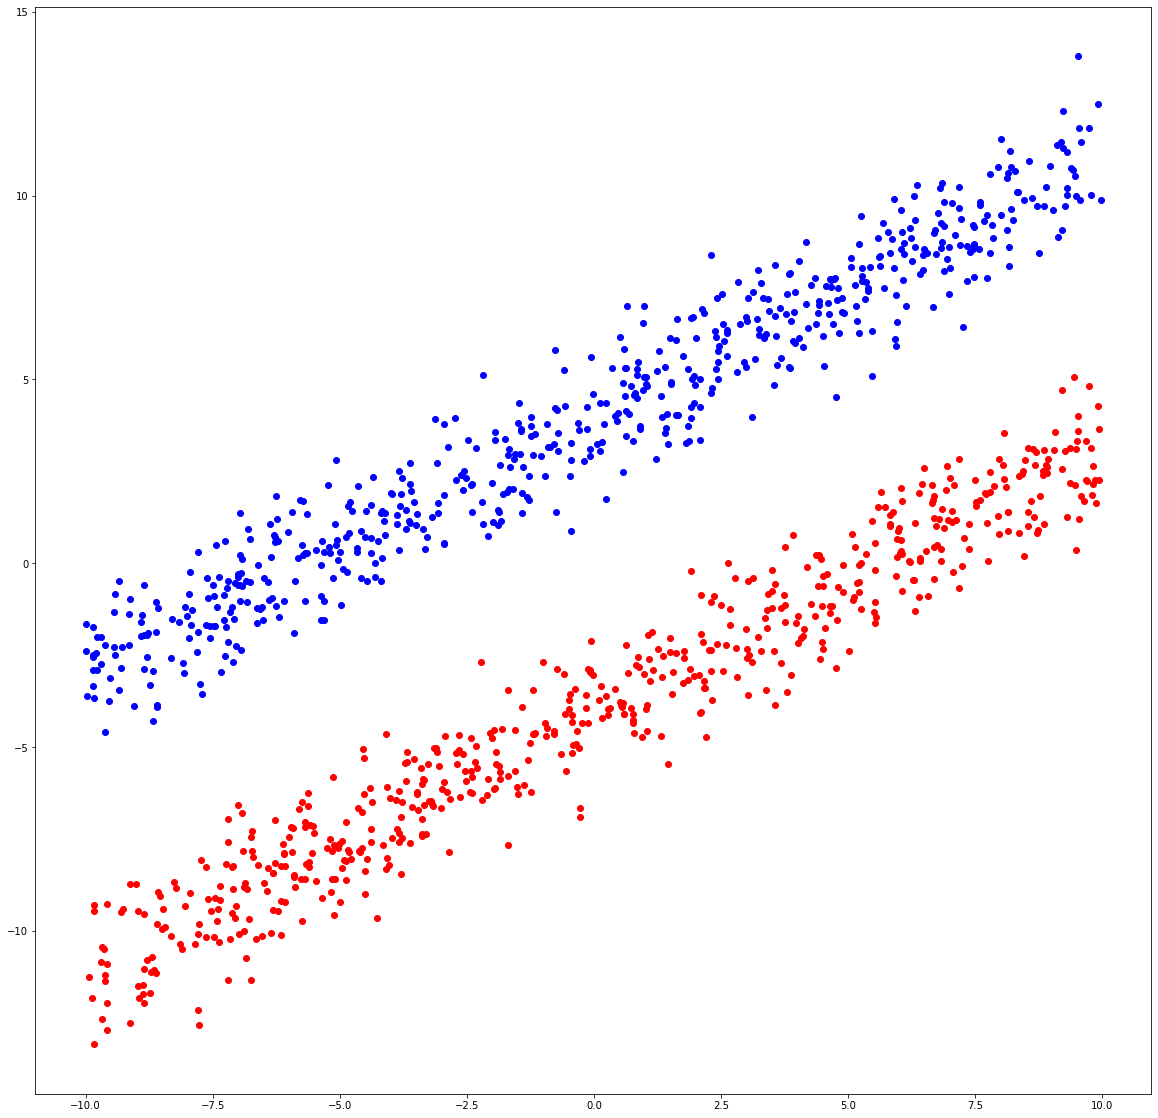

In [338]:
if N == 2:
    plt.figure(figsize=(20, 20))
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='blue')
    plt.scatter(data[labels != 1, 0], data[labels != 1, 1], color='red')
    plt.show()

In [339]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.8)

In [340]:
My_SVM = SVM_LinearSeparableCase(rate=0.00001)
My_SVM.fit(X_train, y_train)
my_predicts = My_SVM.predict(X_test)

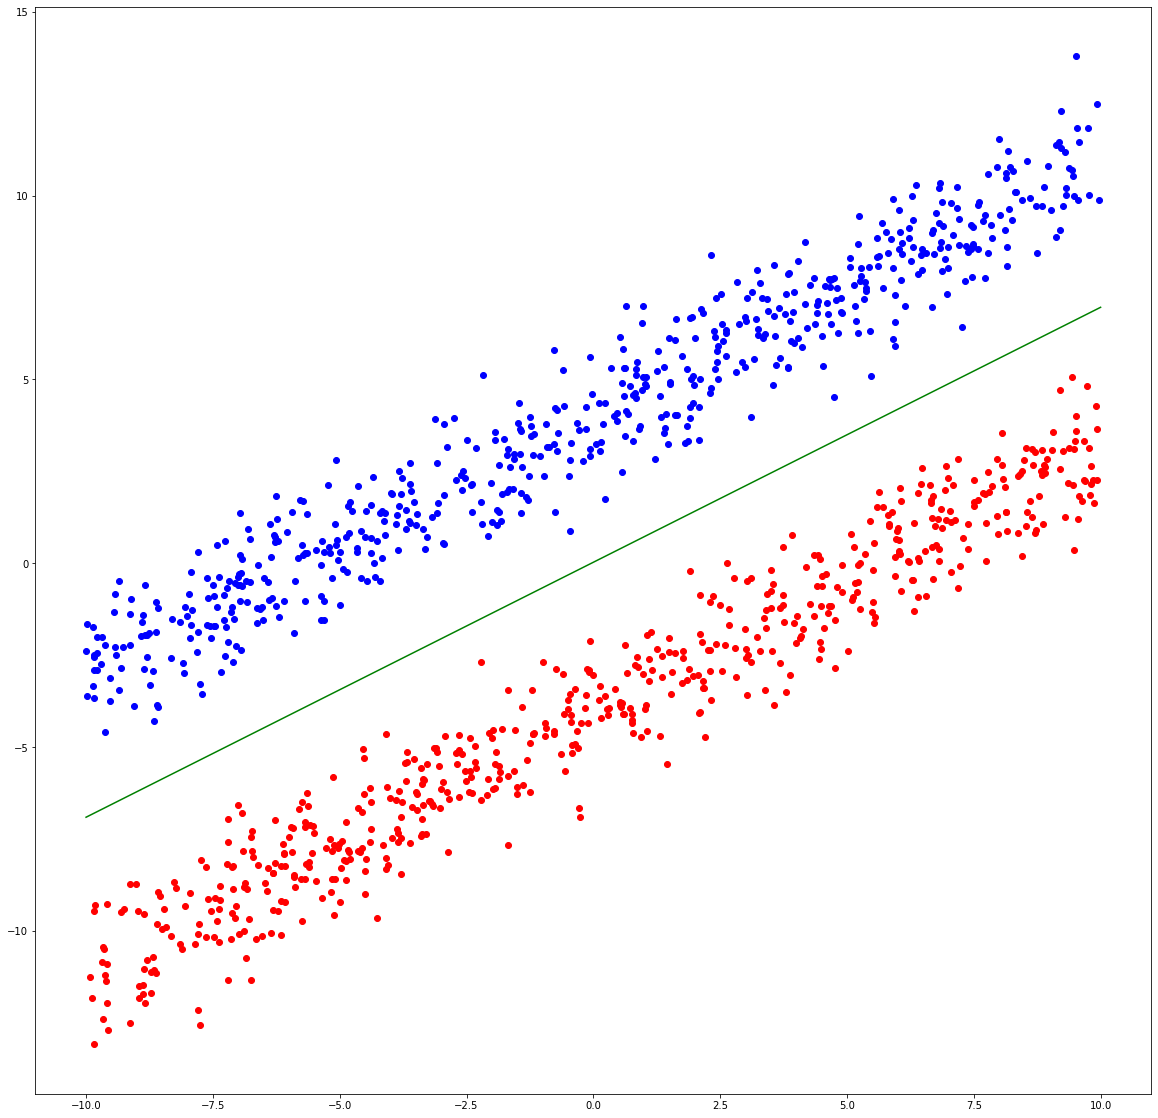

In [341]:
if N == 2:
    plt.figure(figsize=(20, 20))
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='blue')
    plt.scatter(data[labels != 1, 0], data[labels != 1, 1], color='red')
    
    xx = np.array([a, b])
    yy = -1 * (My_SVM.b / My_SVM.w[1] + My_SVM.w[0] / My_SVM.w[1] * xx)
    plt.plot(xx, yy, color='green')
    
    plt.show()

In [342]:
skl_model = svm.SVC()
skl_model.fit(X_train, y_train)
skl_predicts = skl_model.predict(X_test)

In [343]:
print('My SVM accuracy = {:.5f}'.format(accuracy_score(my_predicts, y_test)))
print('Sklearn SVM accuracy = {:.5f}'.format(accuracy_score(skl_predicts, y_test)))

My SVM accuracy = 1.00000
Sklearn SVM accuracy = 1.00000
